In [15]:
import os
import folium
from folium import plugins

import csv
import pandas as pd

m = folium.Map(
    location=[39.984702, 116.318417],
    zoom_start=10
)
loc = pd.read_csv('user0_loc.csv',sep=',',header=0)

coordinates = []
for i, row in loc[["lat","lng"]].dropna().iterrows():
    position = [row["lng"],row["lat"]]
    coordinates.append(position)

# because 13-digit timestamp (in millsecond) is required, and our timestamp is 10-digit (in second), we convert them into timestamps in millseconds
# reference from: https://stackoverflow.com/questions/51313308/why-my-python-timestamp-to-datetime-conversion-is-wrong
datetime = (loc[['timestamp']].values)*1000

plugins.TimestampedGeoJson({
     'type': 'FeatureCollection',
     'features': [
       {
         'type': 'Feature',
         'geometry': {
           'type': 'LineString',
           'coordinates': coordinates,
           },
         'properties': {
           'times': datetime.flatten().tolist()
           }
         }
       ]
      # set period as 'PT1M' 1/minute, display previous locations, and add the points to map
      # reference from: http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Plugins.ipynb
     },period='P1D', add_last_point=True).add_to(m)


m.save(os.path.join('track_loc.html'))

m

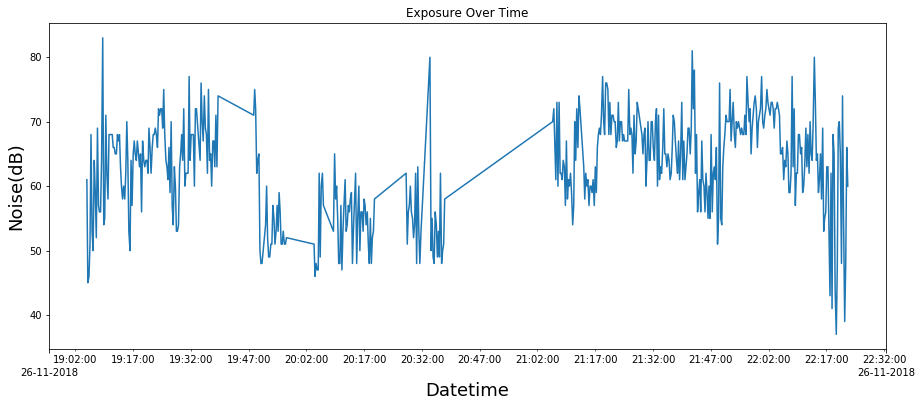

In [4]:
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt 
import matplotlib.dates as md
from matplotlib.pyplot import figure
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
import datetime as dt
import time

# read in exposure data from the csv file
expo = pd.read_csv('expo_sample.csv',sep=',',header=0)

# read in data on timestamp and make it into a list
timestamps = expo[['TIMESTAMP']].dropna().values
timestampslist = timestamps.flatten().tolist()

# convert timestamp to datetimes
# reference from: https://stackoverflow.com/questions/48167835/matplotlib-formatting-of-timestamp-on-x-axis
datetimes=[dt.datetime.fromtimestamp(ts) for ts in timestampslist]

# Exposure measurement 1: extract exposure data on noise, put into a list
noise = expo[['NOISE']].dropna().values
noiselist = noise.flatten().tolist()

x = datetimes
y = noiselist

# make animated line chart
# reference from: https://matplotlib.org/gallery/animation/simple_anim.html
fig, ax = plt.subplots(figsize=(15,6))
line, = ax.plot(x, y, color='#1155dd')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=False)

# set xaxis properties on displaying datetimes
    # reference from: https://stackoverflow.com/questions/48167835/matplotlib-formatting-of-timestamp-on-x-axis
# setting minutelocator and daylocator
    # reference from: https://matplotlib.org/api/dates_api.html
ax.xaxis.set_minor_locator(dates.MinuteLocator(interval=15))   # every 15 minutes
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))  # hours and minutes
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))    # every day
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%d-%m-%Y')) 


# set axis labels and title
    # reference from: http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
ax.set_xlabel('Datetime', fontsize=18)
ax.set_ylabel('Noise(dB)', fontsize=18)
ax.set_title('Exposure Over Time');

# plot x: datetimes, y: noise, save the animated line plot as a .mp4 file
    # reference from: https://matplotlib.org/gallery/animation/simple_anim.html
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)

ani.save("sample_noise.mp4", writer=writer)

ax.plot_date(datetimes, noiselist, '-')



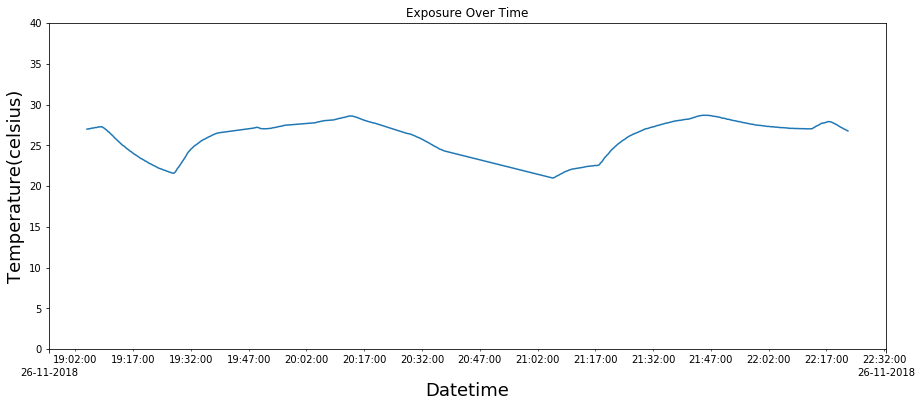

In [5]:
# Exposure measurement 2: extract exposure data on temperature, put into a list
temperature = expo[['TEMPERATURE']].dropna().values
temperaturelist = temperature.flatten().tolist()

x = datetimes
y = temperaturelist

# make animated line chart
# reference from: https://matplotlib.org/gallery/animation/simple_anim.html
fig, ax = plt.subplots(figsize=(15,6))
line, = ax.plot(x, y, color='red')

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=False)

# set xaxis properties on displaying datetimes
    # reference from: https://stackoverflow.com/questions/48167835/matplotlib-formatting-of-timestamp-on-x-axis
# setting minutelocator and daylocator
    # reference from: https://matplotlib.org/api/dates_api.html
ax.xaxis.set_minor_locator(dates.MinuteLocator(interval=15))   # every 15 minutes
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M:%S'))  # hours and minutes
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))    # every day
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%d-%m-%Y')) 


# set axis labels and title
    # reference from: http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
ax.set_xlabel('Datetime', fontsize=18)
ax.set_ylabel('Temperature(celsius)', fontsize=18)
ax.set_title('Exposure Over Time')
ax.set_ylim(0, 40);

# plot x: datetimes, y: noise, save the animated line plot as a .mp4 file
    # reference from: https://matplotlib.org/gallery/animation/simple_anim.html
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)

ani.save("sample_temperature.mp4", writer=writer)

ax.plot_date(datetimes, temperaturelist, '-')



In [ ]:
# this is an alternative way of making plot

# reference from: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

expo = pd.read_csv('expo_sample.csv',sep=',',header=0)

timestamps = expo[['TIMESTAMP']].dropna().values
timestampslist = timestamps.flatten().tolist()

# extract exposure data on noise over time and put into a list
noise = expo[['NOISE']].dropna().values
noiselist = noise.flatten().tolist()

# reference from: https://stackoverflow.com/questions/4090383/plotting-unix-timestamps-in-matplotlib
datetimes=[dt.datetime.fromtimestamp(ts) for ts in timestampslist]
datetimes_nums=md.date2num(datetimes)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(datetimes_nums,noiselist, label="Noise(dB)")

